# SI 618 - Homework #7: Classifiers

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Upload useful libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 1. EDA(Exploratory Data Analysis)

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
display(train_data.head())
display(test_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1. Dataset Overview

In [4]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

1. There exists missing information in the training dataset, with 687 passengers lacking cabin information, 177 passengers lacking age information and 2 passengers lacking embarked information. 
1. For the test dataset, there exists missing information in `Age`, `Fare` and `Cabin`.
1. With the large number of passengers lacking cabin information, cabin information may be dropped for analysis.

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. There are in total 891 passengers' information in the dataset.
1. Around 39% of passengers survived in the disaster.
1. More people are in the second and third class than in the first class cabin.
1. The average of passenger age is around 30 and the oldest passenger is 80 years old.
1. The average of the fare is around 32. The passenger fare has high standard deviation, indicating that the ticket prices for different classes have large variations.
1. Around 38% of passengers are parents/children and around 52% of passengers are siblings/spouses.

In [7]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


1. No two passengers have the same name.
1. There are more male passengers than female passengers.
1. As there are only 147 unique cabins, maybe several passengers share one cabin.
1. There are three ports of embarkation, and Southampton port has the most passengers for embarking.

### 2. Numerical Value Feature Analysis

<AxesSubplot:>

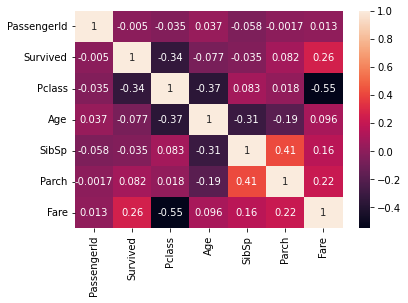

In [8]:
sns.heatmap(train_data.corr(), annot=True)

The above heatmap generates a confusion matrix between each variable. From the heatmap, it can be observed that the passenger class(`Pclass`) and fare(`Fare`) are more correlated with `Survived` in the training data, with values of -0.34 and 0.26.

### 3. Categorical Value Feature Analysis

In [9]:
train_data[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [10]:
train_data[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
train_data[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


From the analysis of categorical values, it is clear that:
1. More than four times of women than men survived.
1. The survived percentage increases as the passenger class is better.
1. More than half of the passengers from S port survived, which surpasses the percentage of survived passengers from C and Q port.

## 2. Train, tune, and ensemble machine learning models
### 1. Data Preprocessing
#### - Fill NAN values of `Embarked`, `Age` and `Fare` with mean values

In [12]:
# 1. Fill NAN values of `Embarked` in the training dataset with the mode
train_data['Embarked'].fillna(train_data['Embarked'].dropna().mode()[0], inplace=True)

In [13]:
# 2. Fill NAN values of `Fare` in the test dataset with the mean values
test_data['Fare'].fillna(test_data['Fare'].dropna().mean(), inplace=True)

In [14]:
# 3. Fill NAN values of 'Age' in both training and test datasets with the mean values
for data in [train_data, test_data]:
    data['Age'].fillna(data['Age'].mean(), inplace = True)

In [15]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

All the NAN values are now filled with according values except for `Cabin`. As presented in EDA, `Cabin` information will be dropped, therefore I do not process `Cabin` data.

### 2. Drop unused variables

In [17]:
train_prepared = train_data.drop(['PassengerId', 'Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1)
test_prepared = test_data.drop(['PassengerId', 'Ticket', 'Cabin', 'Name', 'SibSp', 'Parch'], axis=1)

In [18]:
train_prepared.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [19]:
test_prepared.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


In [20]:
X_train = train_prepared.drop('Survived', axis=1)
X_test = test_prepared
y = train_data['Survived']

### 3. Train, Tune and Ensemble
#### - Data Preprocessing

In [21]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(X_train.select_dtypes(include=[np.number]))
cat_attribs = list(X_train.select_dtypes(exclude=[np.number]))

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),  # scale variables
        ("cat", OneHotEncoder(), cat_attribs),   # covert categorical labels to vector
    ])

X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(test_prepared)

#### - Define models and grid of parameters

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [23]:
classifiers = [
    ("K Nearest Neighbors", KNeighborsClassifier()),
    ("SVM", SVC(random_state=42, probability=True)),
    ("Gaussian Process", GaussianProcessClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Neural Net", MLPClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Naive Bayes", GaussianNB()),
    ("Logistic Regression", LogisticRegression(random_state=42))
    ]

In [24]:
grid_param = [
    # K Nearest Neighbors
    [{
        "weights": ["uniform", "distance"],
        "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "n_neighbors": [1, 3, 5, 7]
    }],
    
    # SVM
    [{
        "C": [0.001, 0.01, 0.1, 1.],
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        'gamma': [ 0.001, 0.01, 0.1, 1],
    }],
    
    # Gaussian Process
    [{
        "max_iter_predict": [5, 10, 15, 20, 25, 30, 35, 40, 50, 100]
    }],
    
    # Decision Tree
    [{
        "max_depth": [3, 5, 7, 9, 11, 13]
    }],
    
    # Random Forest
    [{
        "n_estimators": [5, 10, 15, 20, 25], 
        "max_depth": [3, 5, 7, 9, 11, 13],
        "criterion": ["gini", "entropy"],
    }],
    
    # Neural Net
    [{
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'alpha': [0.0001, 0.001, 0.01, 1, 10],
        'max_iter': [1000]
    }],
    
    # AdaBoost
    [{
        "n_estimators": [5, 10, 15, 20, 25, 50, 75, 100], 
        "learning_rate": [0.001, 0.01, 0.1, 1.],
    }],
    
    # Naive Bayes
    [{
        
    }],
    
    # Logistic Regression
    [{
        "C": [0.001, 0.01, 0.1, 1.],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    }],
    
]

#### - Choose the best parameters

In [25]:
for clf, param in zip (classifiers, grid_param):  
    best_search = GridSearchCV(estimator = clf[1], param_grid=param, cv=10, n_jobs=-1)
    best_search.fit(X_train, y)

    best_param = best_search.best_params_
    print('The best parameter for {} is {}.'.format(clf[1].__class__.__name__, best_param))
    clf[1].set_params(**best_param) 

The best parameter for KNeighborsClassifier is {'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'uniform'}.
The best parameter for SVC is {'C': 0.01, 'gamma': 1, 'kernel': 'poly'}.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 5}.
The best parameter for DecisionTreeClassifier is {'max_depth': 7}.
The best parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 25}.
The best parameter for MLPClassifier is {'activation': 'identity', 'alpha': 0.0001, 'max_iter': 1000}.
The best parameter for AdaBoostClassifier is {'learning_rate': 1.0, 'n_estimators': 75}.
The best parameter for GaussianNB is {}.
The best parameter for LogisticRegression is {'C': 0.1, 'solver': 'liblinear'}.


#### - Ensemble

In [26]:
from sklearn.model_selection import cross_val_score
votingC = VotingClassifier(estimators=classifiers, voting='soft', n_jobs=-1)
votingC = votingC.fit(X_train, y)

In [27]:
predictions = pd.Series(votingC.predict(X_test), name="Survived")
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


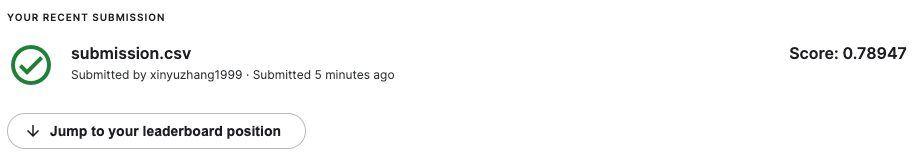

In [1]:
from IPython.display import Image
Image("HW7.png")

My final accuracy is 0.78947.